In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [6]:
df = pd.read_csv('TARP.csv')

In [7]:
print(df.head())

   Soil Moisture  Temperature   Soil Humidity  Time  Air temperature (C)  \
0             54           22              70    21                19.52   
1             12           20              40   104                19.49   
2             34           26              35    62                19.47   
3              7           44              44    93                19.54   
4             50           38              23    92                19.61   

   Wind speed (Km/h)  Air humidity (%)  Wind gust (Km/h)  Pressure (KPa)  \
0               2.13             55.04              6.30          101.50   
1               2.01             55.17             10.46          101.50   
2               1.90             55.30             14.63          101.51   
3               2.28             54.20             16.08          101.51   
4               2.66             53.09             17.52          101.51   

         ph    rainfall     N     P     K Status  
0  6.502985  202.935536  90.0  42.0

In [10]:
print(df.isnull().sum())

Soil Moisture              0
Temperature                0
 Soil Humidity             0
Time                       0
Air temperature (C)    76005
Wind speed (Km/h)      76005
Air humidity (%)       76005
Wind gust (Km/h)       76005
Pressure (KPa)         76005
ph                     97800
rainfall               97800
N                      97800
P                      97800
K                      97800
Status                     0
dtype: int64


In [11]:
thresh = len(df) * 0.8

df_cleaned = df.dropna(thresh=thresh, axis=1)

In [13]:
df_cleaned

,Soil Moisture,Temperature,Soil Humidity,Time,Status
0,54,22,70,21,ON
1,12,20,40,104,OFF
2,34,26,35,62,ON
3,7,44,44,93,OFF
4,50,38,23,92,OFF
...,...,...,...,...,...
99995,74,3,29,83,OFF
99996,58,10,46,82,OFF
99997,4,35,39,17,ON
99998,83,36,56,15,OFF


In [14]:
X = df_cleaned.drop('Status', axis=1)
y = df_cleaned['Status']

In [15]:
X , y

(       Soil Moisture  Temperature   Soil Humidity  Time
 0                 54           22              70    21
 1                 12           20              40   104
 2                 34           26              35    62
 3                  7           44              44    93
 4                 50           38              23    92
 ...              ...          ...             ...   ...
 99995             74            3              29    83
 99996             58           10              46    82
 99997              4           35              39    17
 99998             83           36              56    15
 99999             43           45              45    33
 
 [100000 rows x 4 columns],
 0         ON
 1        OFF
 2         ON
 3        OFF
 4        OFF
         ... 
 99995    OFF
 99996    OFF
 99997     ON
 99998    OFF
 99999     ON
 Name: Status, Length: 100000, dtype: object)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

,Soil Moisture,Temperature,Soil Humidity,Time
75220,74,30,53,91
48955,80,41,25,7
44966,61,33,55,34
13568,54,3,54,73
92727,6,35,69,24
...,...,...,...,...
6265,28,8,64,103
54886,73,8,36,30
76820,75,18,62,42
860,22,28,25,35


In [17]:
# Standardize or normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

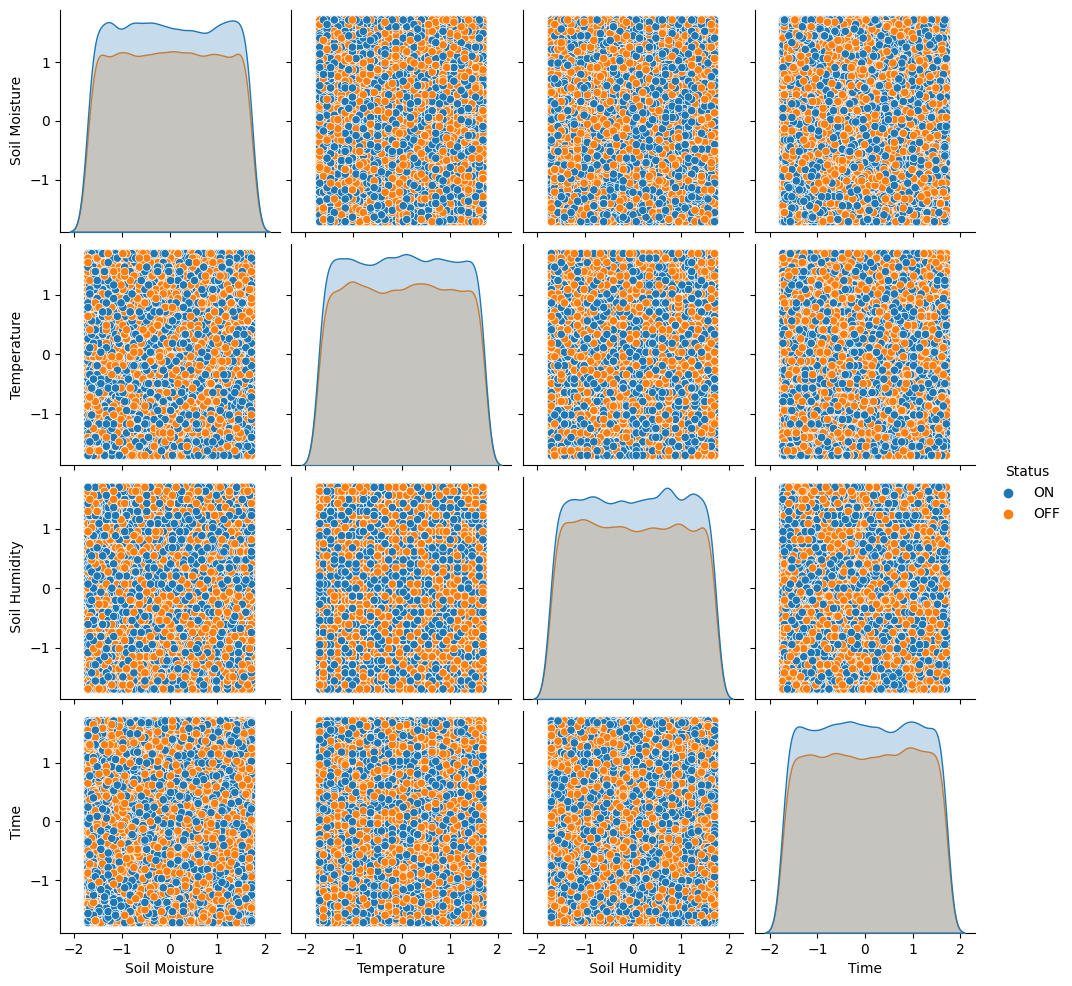

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

df_pairplot = pd.concat([pd.DataFrame(X_train, columns=X.columns), pd.Series(y_train, name='Status')], axis=1)
sns.pairplot(df_pairplot, hue='Status')
plt.show()


<ipython-input-19-180b93c8df11>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_pairplot.corr()


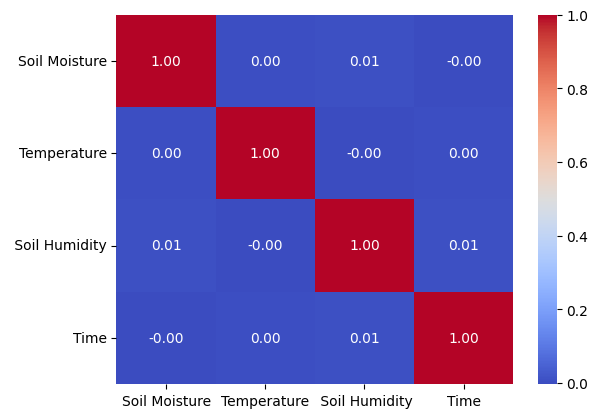

In [19]:
corr_matrix = df_pairplot.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


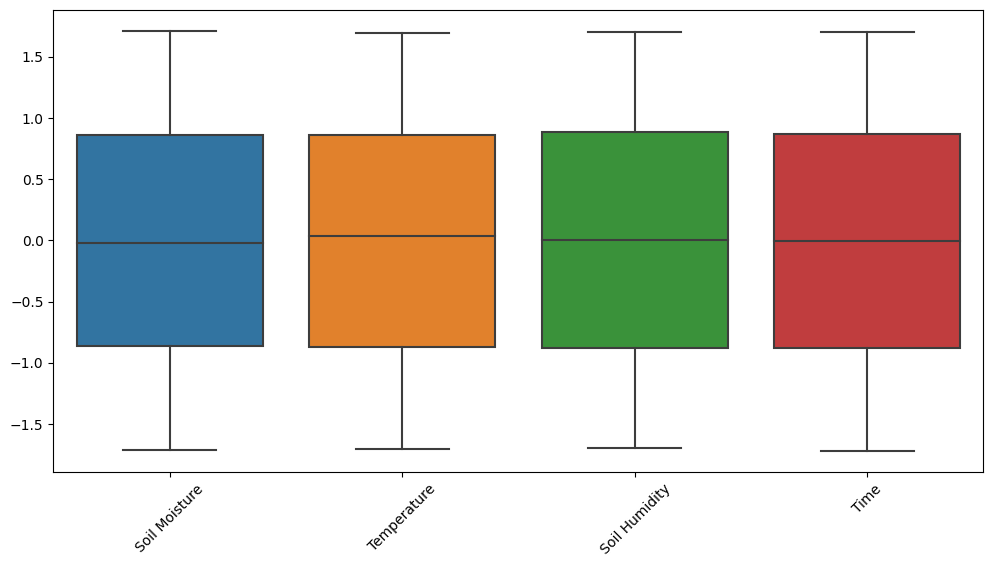

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.DataFrame(X_train, columns=X.columns))
plt.xticks(rotation=45)
plt.show()

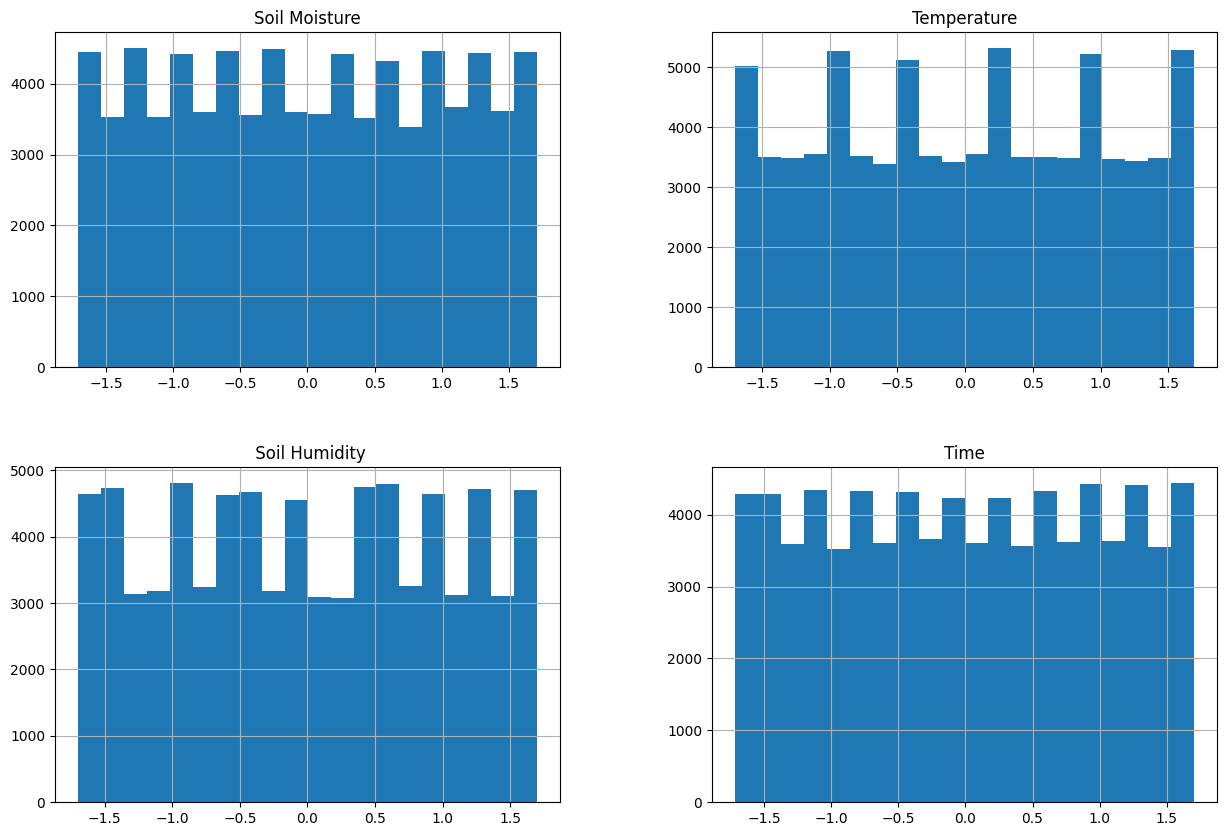

In [21]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_train_df.hist(bins=20, figsize=(15, 10))
plt.show()


In [30]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [31]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model_lr = LogisticRegression()

# Train the model
model_lr.fit(X_train, y_train)


LogisticRegression()

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model
model_dt = DecisionTreeClassifier()

# Train the model
model_dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest model
model_rf = RandomForestClassifier()

# Train the model
model_rf.fit(X_train, y_train)


RandomForestClassifier()

In [34]:
from sklearn.svm import SVC

# Create an SVM model
model_svm = SVC()

# Train the model
model_svm.fit(X_train, y_train)


SVC()

In [35]:
from sklearn.neural_network import MLPClassifier

# Create an MLP model
model_mlp = MLPClassifier()

# Train the model
model_mlp.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [36]:
from xgboost import XGBClassifier

# Create an XGBoost model
model_xgb = XGBClassifier()

# Train the model
model_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
# Assuming you have already trained the models (e.g., model_lr, model_dt, etc.)

# Logistic Regression predictions
y_pred_lr = model_lr.predict(X_test)

# Decision Tree predictions
y_pred_dt = model_dt.predict(X_test)

# Random Forest predictions
y_pred_rf = model_rf.predict(X_test)

# Support Vector Machine predictions
y_pred_svm = model_svm.predict(X_test)

# Neural Network predictions
y_pred_mlp = model_mlp.predict(X_test)

# Gradient Boosting predictions (XGBoost)
y_pred_xgb = model_xgb.predict(X_test)


In [38]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print or use the accuracy values as needed
print(f'Logistic Regression Accuracy: {accuracy_lr}')
print(f'Decision Tree Accuracy: {accuracy_dt}')
print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'SVM Accuracy: {accuracy_svm}')
print(f'Neural Network Accuracy: {accuracy_mlp}')
print(f'XGBoost Accuracy: {accuracy_xgb}')


Logistic Regression Accuracy: 0.71765
Decision Tree Accuracy: 0.9998
Random Forest Accuracy: 0.99995
SVM Accuracy: 0.91915
Neural Network Accuracy: 0.9501
XGBoost Accuracy: 1.0


In [41]:

new_data = pd.DataFrame({
    'Soil Moisture': [5],
    'Temperature': [25],
    ' Soil Humidity': [40],
    'Time': [50]
})

new_data_standardized = scaler.transform(new_data)

prediction_lr = model_lr.predict(new_data_standardized)

predicted_class = label_encoder.inverse_transform(prediction_lr)

print(f'Predicted Class: {predicted_class}')


Predicted Class: [1]


In [43]:
class_mapping = {0: 'OFF', 1: 'ON'}

predicted_class = class_mapping.get(prediction_lr[0], 'Unknown')

print(f'Predicted Class: {predicted_class}')

Predicted Class: ON
